In [46]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
from IPython import display

%matplotlib inline

In [11]:
# random small-world networks
s = 3 # for reproducibility

# parameters -> change these to generate random graphs with (somewhat) different properties
n = 40 # number of nodes
k = 5 # WS: number of nearest neighbors to join
p = .001 # WS: probability of: adding a new edge (NWS), rewiring an existing edge (WS)
m = 5 # BA: number of edges to attach from a new node to an existing node (1 <= m < n)
p_hk = .001 # HK: probability of adding a triangle after adding a random edge

# create the actual random graphs
nws_network = nx.newman_watts_strogatz_graph(n,k,p,seed=s)
ws_network = nx.watts_strogatz_graph(n,k,p,seed=s)
#cws_network = nx.connected_watts_strogatz_graph(n,k,p,seed=s) # if I want to guarantee a connected graph
ba_network = nx.barabasi_albert_graph(n,m,seed=s)
#hk_network = nx.powerlaw_cluster_graph(n,m,p_hk,seed=s) # BA model w/ addl prob of triangles at each time step
#kleinberg_network = nx.naviagable_small_world_graph() # ???

KeyboardInterrupt: 

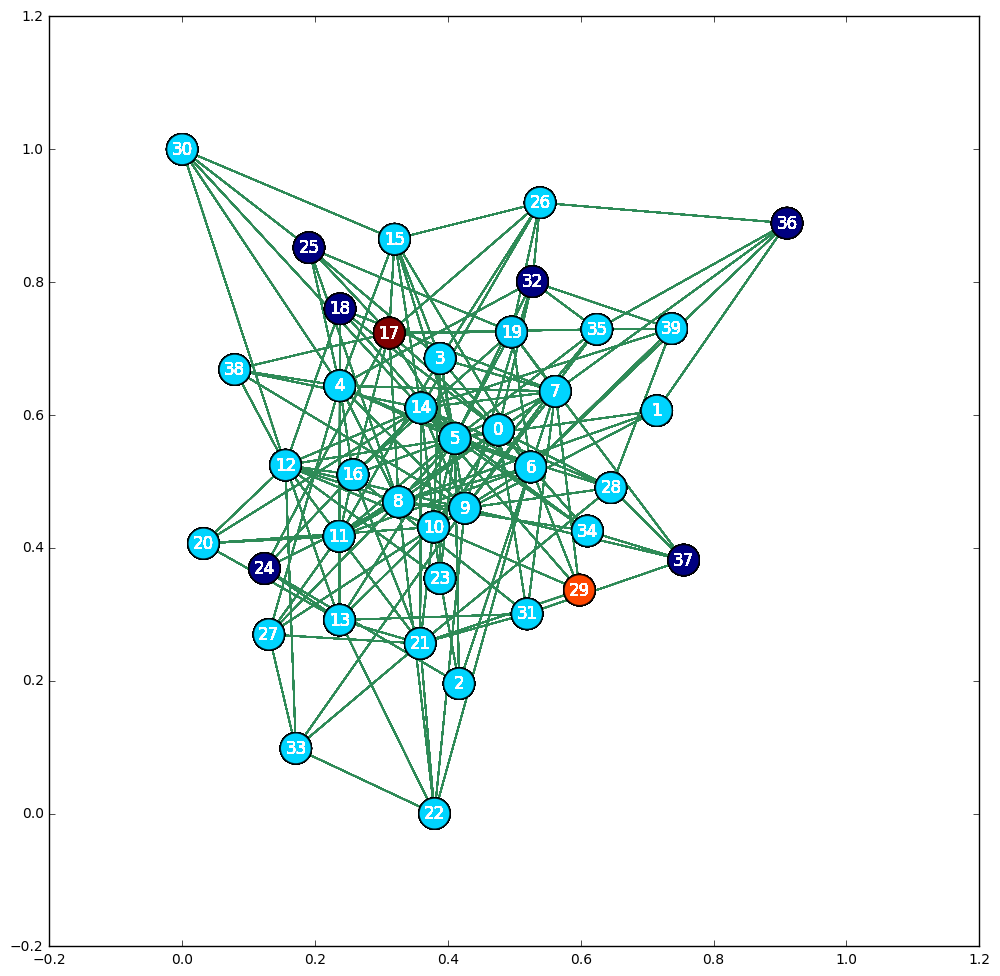

In [76]:
G = ba_network # choose a network type to visualize

# set up drawing
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.set_aspect('equal'); ax.hold(True)
pos = nx.fruchterman_reingold_layout(G)

# set edge attributes
traversed = dict()
for e in G.edges(): traversed[e] = 2
nx.set_edge_attributes(G,'traversed',traversed)

# set node attributes
visited = dict()
for n in G.nodes(): visited[n] = 1
nx.set_node_attributes(G,'visited',visited)

# determine random start and target nodez
N = nx.number_of_nodes(G)
start = random.randint(1,N); target = random.randint(1,N)

# visualize BFS
node_queue = list(); node_queue.append(start)
visited[start] = 6; visited[target] = 4;
nx.set_node_attributes(G,'visited',visited)
while len(node_queue) > 0:
    # get current attributes
    node_list,node_visited = zip(*nx.get_node_attributes(G,'visited').items())
    edge_list,edge_traversed = zip(*nx.get_edge_attributes(G,'traversed').items())
    
    # visualize current step
    nx.draw_networkx_nodes(G,pos,node_size=500,node_color=node_visited,alpha=.75)
    nx.draw_networkx_labels(G,pos,font_size=12,font_color='white')
    nx.draw_networkx_edges(G,pos,edge_color="seagreen")
    display.display(fig)
    display.clear_output(wait=True)
    
    old = current
    current = node_queue.pop(0) # get next node
    if current == target: break # check if done
    if current != start:
        visited[current] = 3; 
        nx.set_node_attributes(G,'visited',visited)
    #traversed[(old,current)] = 4; nx.set_edge_attributes(G,'traversed',traversed)
        
    # otherwise, continue search
    for n in G.neighbors(current):
        if visited[n] == 1: # not yet visited
            node_queue.append(n)

In [75]:
start

15